# Telco Data Final Report   

# Zachary Stufflebeme

In [1]:
#stats model and visualization imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

#custom imports

from myProjectAquire import get_telco_data, get_old_telco, new_telco_data
from myProjectPrepare import prep_telco, split_telco, feat_dist, feat_dist_churn

# My Plan:

Aquire: acquire data through functions saved in my acquire.py along with my encrypted credentials.

Prepare: Prepare and clean my data in such a way that I can plug it in to my classification models without causing error and with the prepared data still holding true to its original meaning.

Explore: Ask statistical questions of my data and create visualizations of the results in order to improve comprehension by people reading the report without clarifications from my presentation.

Model:Create models that try to accurately predict customer churn, Validate that all of your models are accurate not just on your train data but on outside data as well.

Deliver: Put all of my findings together in a final report where I make things as easy to understand as possible.


# Project Summary:

In my project I was able to create 3 models That all performed similarly well and above the baseline. I used most features of the dataset except churn date, signup date and total_charges as that returned my highest accuracies. My Logistic Regression model was my best model as it was nearly 80% accurate in determining if a customer will churn. I also found that monthly charges and paperless billing are important features in predicting churn, and that tenure and using paperless billing are completely independent categories that can be left in without worry of redundancy, while total charges is just the product of two other features and is redundant and can be dropped. My main take aways from report would be my best working model and that I have Identified the most relevant feature , monthly_charges,  which we can manipulate going forward to try and reduce customer churn.

# Acquire Data:

Most of the work here has already been taken care of in my acquire.py

In [2]:
df = get_telco_data()

In [3]:
df

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,signup_date,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,online_backup.1,device_protection.1,tech_support.1,streaming_tv.1,streaming_movies.1
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2021-04-21 18:07:34,Yes,No,1,No,Yes,No,Yes,Yes,No
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,2021-04-21 18:07:34,Yes,Yes,1,No,No,No,No,No,Yes
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,2021-09-21 18:07:34,Yes,No,2,No,No,Yes,No,No,No
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,2020-12-21 18:07:34,Yes,No,2,No,Yes,Yes,No,Yes,Yes
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,2021-10-21 18:07:34,Yes,No,2,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,9282-IZGQK,Female,0,No,No,1,Yes,Yes,2,...,2021-12-21 18:07:34,Yes,Yes,2,No,No,No,No,No,Yes
7039,7039,9462-MJUAW,Male,0,No,No,4,Yes,Yes,1,...,2021-09-21 18:07:34,Yes,Yes,1,No,No,No,No,No,No
7040,7040,9705-ZJBCG,Female,0,Yes,Yes,13,Yes,No,1,...,2020-12-21 18:07:34,Yes,No,1,Yes,No,No,Yes,No,No
7041,7041,9777-IQHWP,Male,0,Yes,Yes,64,Yes,Yes,2,...,2016-09-21 18:07:34,Yes,Yes,2,Yes,No,Yes,No,No,Yes


This is the way the dataframe is formatted before I make any changes. I retrieved the data from our SQL database using my encrypted credentials from my env file. The data is not formatted very well for me to use our classification models and I will have to make a lot of changes.

# Prepare Data:

In [4]:
# Here I am running the previous df through my prepare functions i created in my prepare.py, as well as an 
#             additional decision I made to delete the 'unnamed: 0' column
newdf = prep_telco(df)
newdf = newdf.drop(columns = 'Unnamed: 0')
userid = pd.DataFrame()

In [5]:
newdf


,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,is_female,has_partner,has_dependents,has_phone_service,uses_paperless_billing,did_churn,has_mult_lines,has_online_security,has_online_backup,has_device_protection,has_tech_support,can_stream_tv,can_stream_movie
0,0002-ORFBO,0,9,1,2,2,0.471144,1,1,1,1,1,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0003-MKNFE,0,9,1,1,2,0.414428,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0004-TLHLJ,0,4,2,1,1,0.553731,0,0,0,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0011-IGKFF,1,13,2,1,1,0.793532,0,1,0,1,1,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0013-EXCHZ,1,3,2,1,2,0.653234,1,1,0,1,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,0,1,2,1,1,0.664179,1,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7039,9462-MJUAW,0,4,1,1,2,0.319900,0,0,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7040,9705-ZJBCG,0,13,1,2,3,0.357214,1,1,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7041,9777-IQHWP,0,64,2,3,3,0.747761,0,1,1,1,0,0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


As you can see I have made a lot of changes to the data within my prepare.py in order for it to be formatted in a way that works with the different ML models I will be creating.

# behind the scenes:

Preperation is where I found myself spending most of my time as the telco data was not exactly perfect for model creation. I will try and briefly summarize what I did: 

- deleted all columns filled with duplicate values to get rid of unnecessary features.
- made new encoded columns all of my categorical variables to use them in my classification models.
- After doing that I had to drop all of the old columns I just encoded in new columns, getting rid of all categorical data.
- I also decided to get rid of total charges as it was just a product of two other features and wasnt really adding anything unique to my data. 
- All that was laeft to do from there was to fix muddy data such as nulls that were appearing in certain places which was linked to weather or not they had internet service. It seemed appropriate to set all of the nulls to 0 so thats what I chose to do.


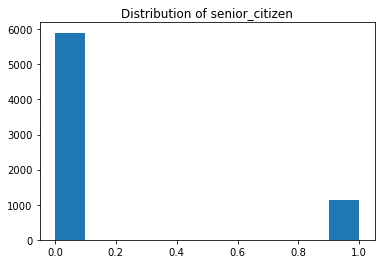

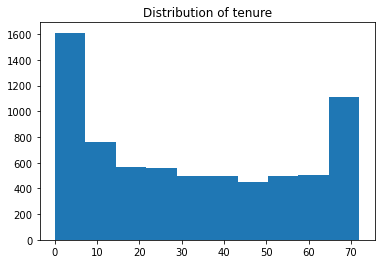

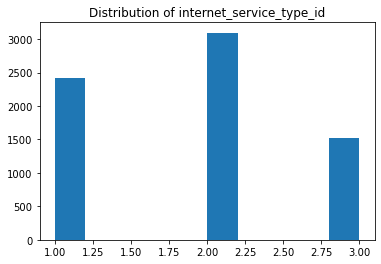

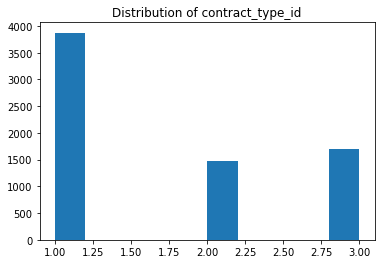

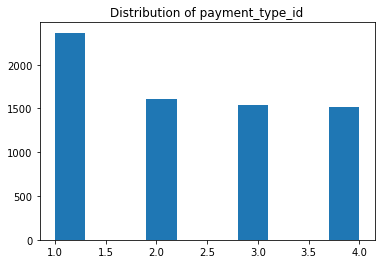

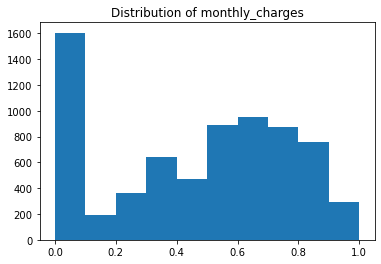

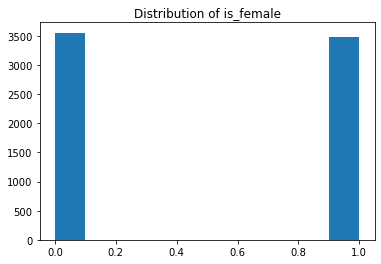

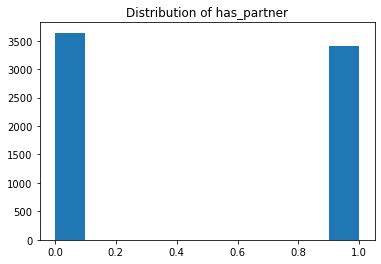

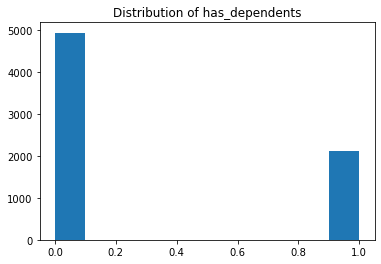

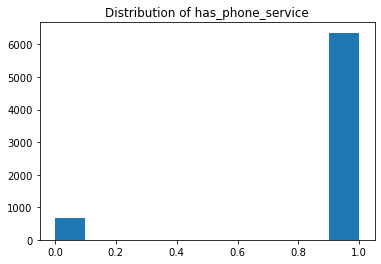

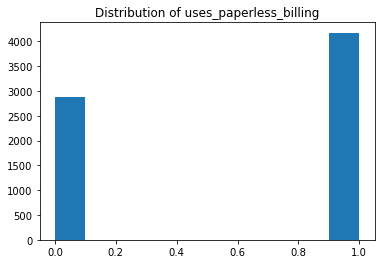

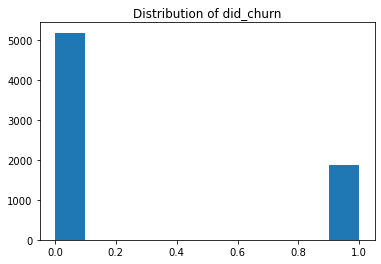

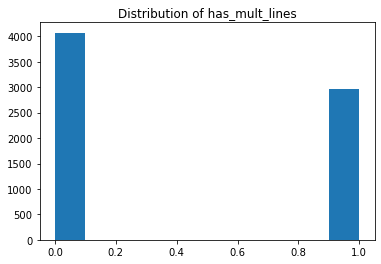

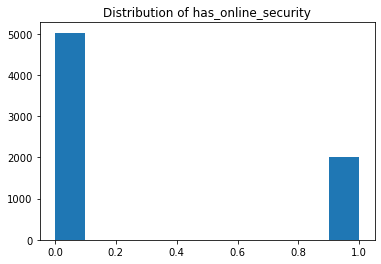

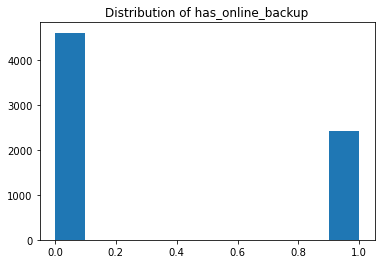

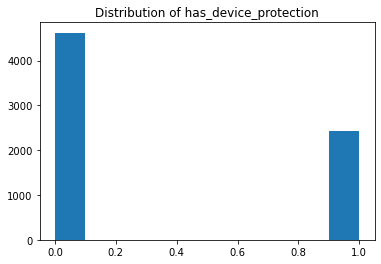

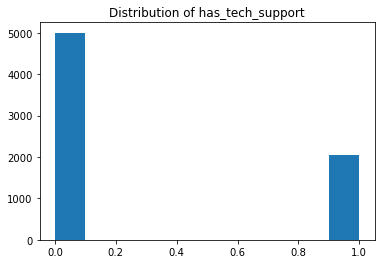

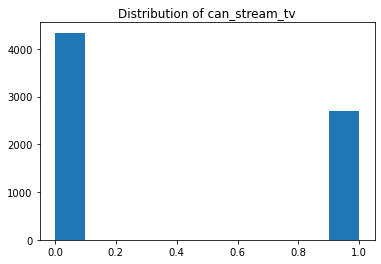

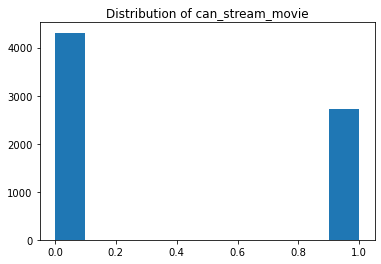

In [6]:
feat_dist(newdf) 

Here I have provided several visuals that demonstrate the distributions of each feature. The most potentially valuable looking distribution would be the monthly charges as it seems to indicate that it would be a relevant feature.


In [7]:
#calling my split data function from my prepare in order to have training, validating, and testing portions of my data.
train, validate, test = split_telco(newdf)

In [8]:
user_id = pd.DataFrame()
user_id['user_id'] = test.customer_id
train = train.drop(columns = 'customer_id')
validate = validate.drop(columns = 'customer_id')
test = test.drop(columns = 'customer_id')
x_train = train.drop(columns = 'did_churn')
y_train = train.did_churn
x_validate = validate.drop(columns ='did_churn')
y_validate = validate.did_churn
x_test = test.drop(columns = 'did_churn')
y_test = test.did_churn


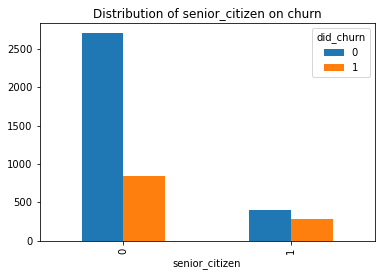

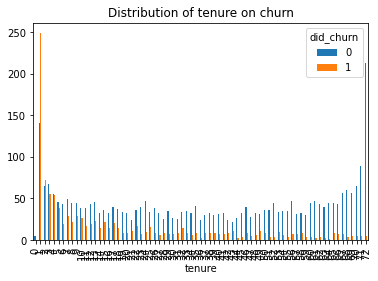

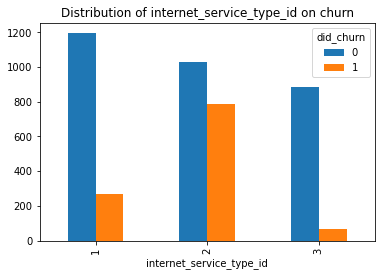

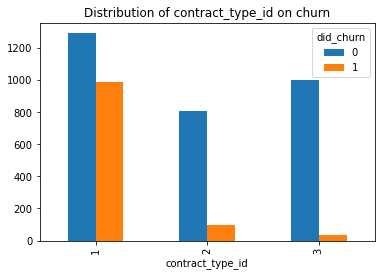

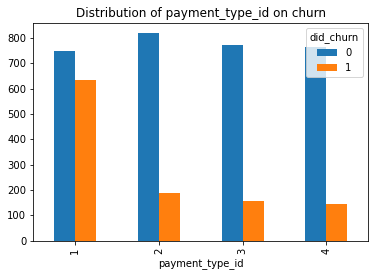

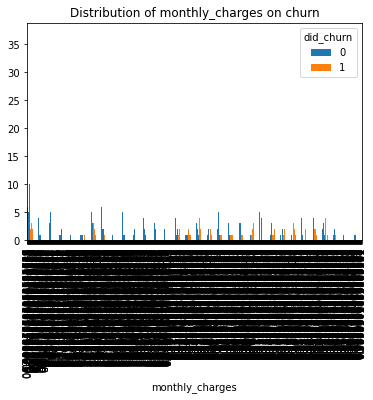

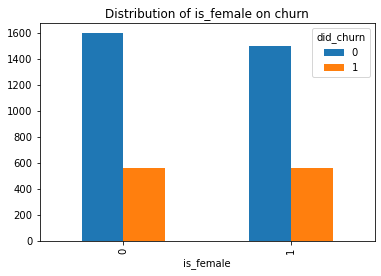

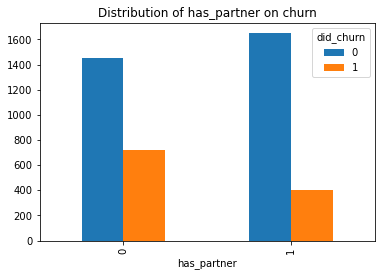

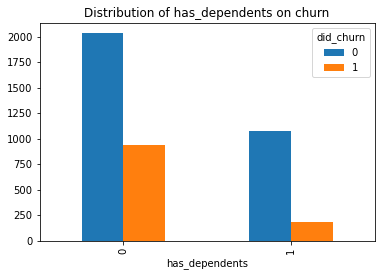

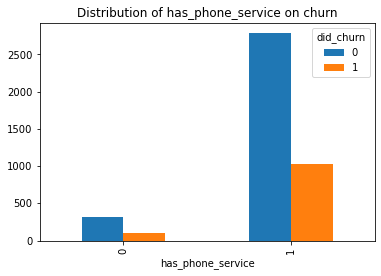

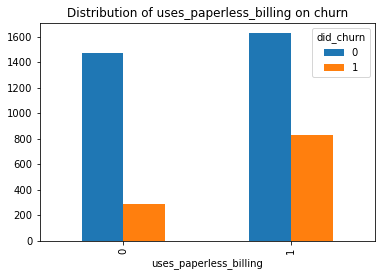

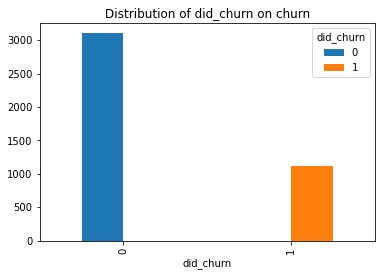

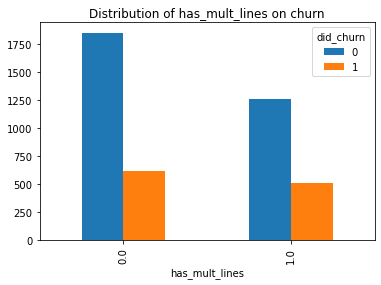

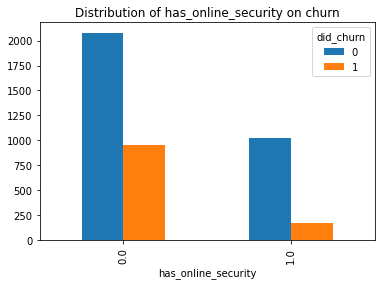

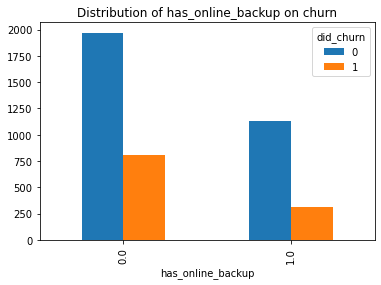

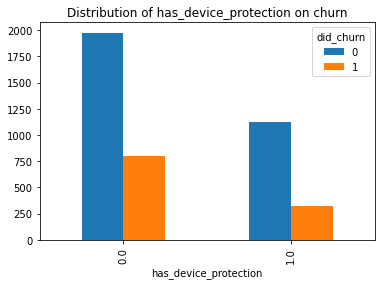

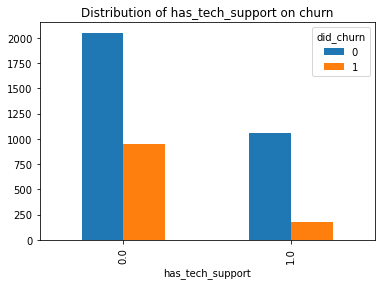

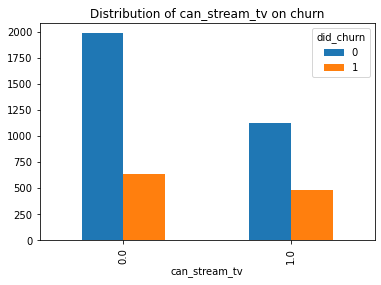

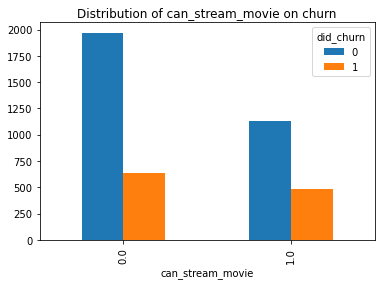

In [9]:
feat_dist_churn(train)

here Ive created the same distributions but now I have also split the distributions by did and did not churn to provide a little bit more insight on the features relevance to churn.

-I made new encoded columns all of my categorical variables so that I could use them in my classification models.




-After doing that I had to drop all of the old columns I just encoded in new columns, getting rid of all categorical data.





- I also decided to get rid of total charges as it was just a product of two other features and wasnt really adding anything unique to my data.

-All that was laeft to do from there was to fix muddy data such as nulls that were appearing in certain places which was linked to weather or not they had internet service. It seemed appropriate to set all of the nulls to 0 so thats what I chose to do.



# Data Exploration:

QUESTION 1 :Does Tenure Correlate with paperless billing?:

- Hnull - There is no correlation between Tenure and paperless billing

- Halt - There is a correlation between Tenure and paperless billing

(maybe significant proportion of people that dont use paperless billing have high tenure. high tenure = old and I would imagine older people are less likely to bill online)

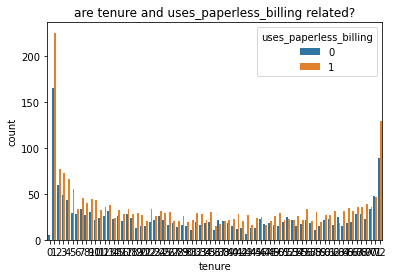

In [10]:
alpha = .05
#sns.relplot(data=train, x='tenure', y='uses_paperless_billing')
sns.countplot(data = train, x = 'tenure', hue='uses_paperless_billing' )

plt.title('are tenure and uses_paperless_billing related?')
plt.show()
#This shows that the instances of people using paperless billing is not related to their tenure as people do 
# and do not use paperless billing in a similar amount across all  values of tenure.

In [11]:
r, p = stats.pearsonr(train.tenure, train.uses_paperless_billing)
r, p
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis that there is no correlation.")
    

We fail to reject the null hypothesis that there is no correlation.


This means that tenure and paperless billing can both be used as features in my models as they wont fill it with redundant information.

QUESTION 2: Is uses paperless billing the same amongst people that do and dont churn?

- Hnull - using paperless billing is the same amongst people that do and dont churn.


- Halt - using paperless billing is statistically different in people that do and dont churn


<AxesSubplot:xlabel='uses_paperless_billing', ylabel='count'>

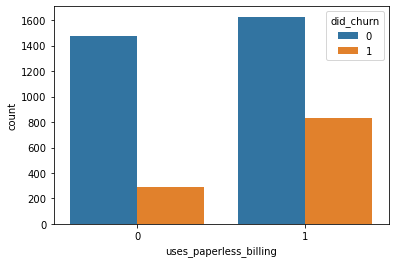

In [12]:
sns.countplot(data = train, x = 'uses_paperless_billing', hue = 'did_churn')

In [13]:
churn = train[train['did_churn']== 1]
no_churn = train[train['did_churn'] == 0]

In [14]:
tstat, p = stats.ttest_ind(churn.uses_paperless_billing,
                no_churn.uses_paperless_billing, 
                equal_var=False
               )
print(f'The p-value is less than the alpha: {p < alpha}')

The p-value is less than the alpha: True


Since the p-val is less than alpha we can reject the null hypothesis that using paperless billing is the same amongst those who do and dont churn.

This means that Using paperless billing could be a useful feature to include in our modeling.


QUESTION 3: Is monthly charges the same amongst people that do and don't churn?

- Hnull - monthly charges is the same amongst people that do and dont churn.

- Halt - monthly charges is not the same amongst people that do and dont churn.

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

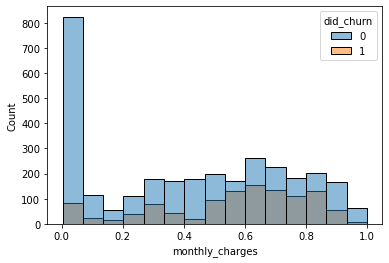

In [15]:
sns.histplot(data = train, x = 'monthly_charges', hue = 'did_churn')

In [16]:
tstat, p = stats.ttest_ind(churn.monthly_charges,
                no_churn.monthly_charges, 
                equal_var=False
               )
print(f'The p-value is less than the alpha: {p < alpha}')

The p-value is less than the alpha: True


Since the p-val is less than alpha we can reject the null hypothesis and can conclude that monthly charges would be a useful feature for our model.

Question 4: What is the most relevant feature to customer churn

In [17]:
logreg =LogisticRegression()
logreg.fit(x_train,y_train)
log_coeffs = pd.DataFrame(logreg.coef_[0], index=x_train.columns,
                         columns=['coeff'])
log_coeffs.coeff.nlargest(1)

monthly_charges    3.695189
Name: coeff, dtype: float64

The most relevant feature to customer churn would be monthly_charges

IMPORTANT FINDINGS FROM EXPLORATION:

- Tenure and Paperless billing are statistically different and are not redundant features.
- using paperless billing is not distrubuted the same amongst churn and not churn, making it an important feature for my models
- monthly charges are not the same amongst churn and not churn, implying it will also be an important feature for models
- monthly charges is the most relevant feature according to my list of logistic regression coefficients.

# Models and Evaluation:

Models I will make:

- Decision tree classifier

- Random Forest

- Logistic Regression

I found the most success using all of these features in the dataset. it seemed the anytime I removed features my accuracy went down.

My goal for the models will be to improve upon my baseline accuracy which is 73%


In [18]:
baseline_accuracy = round((train.did_churn == 0).mean(), 4) * 100

In [19]:
baseline_accuracy

73.47

-------------------------------------------------------------Decision Tree Model---------------------------------------------------------------------------------

In [20]:
# This is where I make the different models and find the best parameters for my Decision Tree
metrics = []
for i in range(1, 21,1):
    DTC = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    DTC = DTC.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    train_acc = DTC.score(x_train, y_train)
    
    val_acc = DTC.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": train_acc,
        "validate_accuracy": val_acc
    }
    
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734675,0.734564,0.000111
1,2,0.764260,0.726757,0.037504
2,3,0.792663,0.770050,0.022613
3,4,0.801420,0.772889,0.028532
4,5,0.806627,0.772889,0.033739
5,6,0.814675,0.771469,0.043205
6,7,0.829822,0.762952,0.066870
7,8,0.842840,0.763662,0.079178
8,9,0.867219,0.758694,0.108525
9,10,0.885444,0.752307,0.133137


As you can see here we are getting our best and most consistant results at a max depth of 4, so that is what we will use going forward.

In [21]:
#Here I am creating fitting and scoring my Decision Tree Model
DTC = DecisionTreeClassifier(max_depth = 4)
DTC.fit(x_train,y_train)
DTC.score(x_validate,y_validate) * 100

77.2888573456352

In [22]:
# Here I am printing out a more detailed classification report of my DecisionTree model
y_preds = pd.DataFrame({
 'y_act': y_validate,
'baseline': 0,
'DTC': DTC.predict(x_validate)})
pd.DataFrame(classification_report(y_preds.y_act, y_preds.DTC, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.820054,0.592466,0.772889,0.706260,0.759644
recall,0.885024,0.462567,0.772889,0.673795,0.772889
f1-score,0.851301,0.519520,0.772889,0.685410,0.763234
support,1035.000000,374.000000,0.772889,1409.000000,1409.000000


as you can see on this model I was able to achieve a nearly 5 % increase in ability to determine customer churn compared to our baseline model.


------------------------------------------------------------Random Forest Model------------------------------------------------------------------------------------------

In [23]:
#This is where I made the different models and chose my best parameters
metrics = []
l = 20
for i in range(2, 21,2):
    rf = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    rf = rf.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    train_acc = rf.score(x_train, y_train)
    
    val_acc = rf.score(x_validate, y_validate)

    output = {
        'min_leaf': l,
        "max_depth": i,
        "train_accuracy": train_acc,
        "validate_accuracy": val_acc
    }
    
    metrics.append(output)
    l = l - 2
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,20,2,0.755740,0.745919,0.009821
1,18,4,0.802840,0.782825,0.020016
2,16,6,0.822012,0.793471,0.028541
3,14,8,0.849231,0.793471,0.055760
4,12,10,0.894438,0.794180,0.100258
5,10,12,0.953609,0.790632,0.162978
6,8,14,0.986036,0.783534,0.202501
7,6,16,0.993846,0.782825,0.211021
8,4,18,0.997160,0.783534,0.213625
9,2,20,0.997870,0.789922,0.207948


Here you can see that we were getting our best results at a min leaf of 16 and a max depth of 6, so we will use those parameters as we validate.

In [24]:
rf = RandomForestClassifier(min_samples_leaf = 16 ,max_depth = 6 , random_state = 123)
rf.fit(x_train,y_train)
rf.score(x_validate,y_validate)

0.7970191625266146

above is how we score on validate

In [25]:
y_preds = pd.DataFrame({
 'y_act': y_validate,
'baseline': 0,
'rf': rf.predict(x_validate)})
pd.DataFrame(classification_report(y_preds.y_act, y_preds.rf, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.827074,0.666667,0.797019,0.746870,0.784496
recall,0.914976,0.470588,0.797019,0.692782,0.797019
f1-score,0.868807,0.551724,0.797019,0.710266,0.784642
support,1035.000000,374.000000,0.797019,1409.000000,1409.000000


I am still evaluating above our baseline and was nearly able to close the gap on 80% accuracy predicting customer churn with this model.

------------------------------------------------------------Logistic Regression------------------------------------------------------------------------------------------

For my logistic regression model I found my best results at a C value of .1

In [26]:
# This is where I made the different models and found the best parameter.
metrics = []
for i in range(1, 11,1):
    i = i * .1
    logreg = LogisticRegression(C = i)
    logreg.fit(x_train,y_train)

    # Fit the model (on train and only train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    train_acc = logreg.score(x_train, y_train)
    
    val_acc = logreg.score(x_validate, y_validate)

    output = {
        "C-val": i,
        "train_accuracy": train_acc,
        "validate_accuracy": val_acc
    }
    
    metrics.append(output)
    l = l - 2
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,C-val,train_accuracy,validate_accuracy,difference
0,0.1,0.809941,0.799858,0.010083
1,0.2,0.808994,0.797019,0.011975
2,0.3,0.808284,0.798439,0.009845
3,0.4,0.808284,0.794890,0.013394
4,0.5,0.808994,0.795600,0.013394
5,0.6,0.808284,0.797729,0.010555
6,0.7,0.808284,0.794890,0.013394
7,0.8,0.808521,0.794890,0.013631
8,0.9,0.809231,0.794180,0.015050
9,1.0,0.808521,0.796309,0.012211


As you can see we got our best results at a c value of .1, so we will use that as our parameter going forward.

In [27]:
logreg = LogisticRegression(C = .1 , random_state = 123)
logreg.fit(x_train,y_train)
logreg.score(x_validate,y_validate)

0.7998580553584103

In [28]:
y_preds = pd.DataFrame({
 'y_act': y_validate,
'baseline': 0,
'logreg': logreg.predict(x_validate)})
pd.DataFrame(classification_report(y_preds.y_act, y_preds.logreg, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.831718,0.667883,0.799858,0.749801,0.788230
recall,0.912077,0.489305,0.799858,0.700691,0.799858
f1-score,0.870046,0.564815,0.799858,0.717430,0.789027
support,1035.000000,374.000000,0.799858,1409.000000,1409.000000


For my final and best model we come in at just under 80% accuracy which is around 1 % more precise than my previous two models and 6 % more than the baseline.

IMPORTANT FINDINGS FROM EVALUATION:

- I was able to create 3 models that are training and validating above the baseline
- My best performing model is my Logistic regression model validating at almost 80%
- My models are achieving very high accuracies nearing 100% on the train datasets and as I move to validating the accuracy falls to around 80 % on all models

# Testing best model:

Lets test the best model against unseen data.

In [ ]:
predicted_test = logreg.predict(x_test)
print(classification_report(y_test, logreg.predict(x_test)))


As you can see We are  testing at around 79% which is very similar to how we tested on validate which is above the baseline by about 6 %.

#  Creating Predictions CSV:

In [ ]:
prob_test = logreg.predict_proba(x_test)

In [ ]:
preds_df = pd.DataFrame(prob_test, columns= logreg.classes_.tolist())
preds_df = preds_df.rename(columns={0 : 'No Churn', 1: 'Churn'})
preds_df = preds_df.drop(columns = 'No Churn')
preds_df

In [ ]:
reset_test = test.reset_index()

In [ ]:
reset_test.head()

In [ ]:
test_prob_df = pd.concat([reset_test, preds_df], axis=1)
test_prob_df.head()

In [ ]:
test

In [ ]:
test_prob_df['predicted'] = predicted_test
test_prob_df.head()

In [ ]:
test_prob_df.set_index("index", inplace = True)

In [ ]:
test_prob_df

In [ ]:
csv_df = test_prob_df[[ 'Churn', 'predicted']]
#csv_df = pd.concat([csv_df, user_id], axis=1)

In [ ]:
csv_df

In [ ]:
csv_df = pd.concat([user_id, csv_df], axis=1)

In [ ]:
csv_df

In [ ]:
csv_df.to_csv('predictions.csv')

# Conclusion:

In conclusion I found some important features to look at moving forward as well as made a good start on creating a model that can accurately predict customer churn. In the future I would like to experiment a little more with my feature selection and find a combination that can further increase my accuracy.

# Business Reccomendation : 

Since monthly charges is the most related feature to customer churn I would reccomend lowering our monthly charges as our best action to reducing customer churn.